### IMPORT NECESSARY LIBRARIES

In [76]:
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
import pickle
import random

from spacy import displacy
import docx
import spacy
from spacy import schemas
from spacy import Dict
from spacy.lang.en.stop_words import STOP_WORDS
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import textract
import antiword
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### IMPORT DATASETS

In [8]:
data1 = pd.read_csv("intership_resumes.csv")
data2 = pd.read_csv("Peoplesoft_Resumes.csv")
data3 = pd.read_csv("React_Developer_resumes.csv")
data4 = pd.read_csv("SQLDeveloperLightning_Resumes.csv")
data5 = pd.read_csv("workday_resumes.csv")

In [9]:
Resume = pd.concat([data1,data2,data3,data4,data5],axis=0)
Resume = Resume.reset_index()
Resume = Resume.drop(columns='Number',axis=0)
Resume = Resume.drop(columns='index',axis=0)
Resume

,Label,CV
0,Internship,Name: Ravali P Curriculum Vitae Specialization...
1,Internship,SUSOVAN BAG Seeking a challenging position in ...
2,Peoplesoft,Anubhav Kumar Singh To work in a globally comp...
3,Peoplesoft,Profile Summary: 7+ years of experience in imp...
4,Peoplesoft,PeopleSoft Database Administrator Gangareddy P...
...,...,...
74,workdayResumes,Workday Integration Consultant Name : Sri Kris...
75,workdayResumes,SRIKANTH (WORKDAY HCM CONSULTANT) Seeking suit...
76,workdayResumes,WORKDAY | HCM | FCM Name : Kumar S.S Role : Wo...
77,workdayResumes,Venkateswarlu.B Workday Consultant Having 5.3 ...


### Exploratory Data Analysis (EDA)

In [10]:
Resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   79 non-null     object
 1   CV      79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [11]:
Resume.isnull().sum()

,0
Label,0
CV,0


### Calculating each Characterstic in dataframe BEFORE CLEANING

In [15]:
before_characters=Resume["CV"].apply(len)
before_characters

,CV
0,2114
1,1310
2,6967
3,7271
4,5908
...,...
74,6512
75,6156
76,7205
77,2610


In [16]:
print('Total Number of characters before cleaning dataset :',before_characters.sum())
print('Mean of each characters before cleaning the dataset:',before_characters.mean())
print('Median of characters before cleaning the dataset:',before_characters.median())
print('Standard Deviation of characters before cleaning the dataset:',before_characters.std())
print('skew of characters before cleaning the dataset:',before_characters.skew())

Total Number of characters before cleaning dataset : 362913
Mean of each characters before cleaning the dataset: 4593.835443037975
Median of characters before cleaning the dataset: 3696.0
Standard Deviation of characters before cleaning the dataset: 3021.5634619556013
skew of characters before cleaning the dataset: 1.8420390755120162


### Calculating each WORD Characterstic in dataframe BEFORE cleaning

In [17]:
before_words = Resume['CV'].apply(lambda x: len(str(x).split(' ')))
before_words

,CV
0,280
1,184
2,934
3,987
4,786
...,...
74,889
75,878
76,1027
77,352


In [18]:
print('Total Number of Word in dataset before cleaning:',before_words.sum())
print('Mean of each Word in dataset before cleaning:',before_words.mean())
print('Median of Word in dataset before cleaning:',before_words.median())
print('Standard Deviation of Word in dataset before cleaning:',before_words.std())
print('skew of Word dataset before cleaning:',before_words.skew())

Total Number of Word in dataset before cleaning: 51305
Mean of each Word in dataset before cleaning: 649.4303797468355
Median of Word in dataset before cleaning: 514.0
Standard Deviation of Word in dataset before cleaning: 422.97516698471946
skew of Word dataset before cleaning: 1.8389509436825116


### Data Preprocessing

##### We will perform label encoding to convert category variable from string datatype to float datatype

In [19]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
Resume["Encoded_Skill"] = le_encoder.fit_transform(Resume["Label"])
Resume.head()

,Label,CV,Text,Encoded_Skill
0,Internship,Name: Ravali P Curriculum Vitae Specialization...,name ravali p curriculum vitae specialization ...,0
1,Internship,SUSOVAN BAG Seeking a challenging position in ...,susovan bag seeking challenging position field...,0
2,Peoplesoft,Anubhav Kumar Singh To work in a globally comp...,anubhav kumar singh work globally competitive ...,1
3,Peoplesoft,Profile Summary: 7+ years of experience in imp...,profile summary year experience implementing u...,1
4,Peoplesoft,PeopleSoft Database Administrator Gangareddy P...,peoplesoft database administrator gangareddy p...,1


In [20]:
Resume.Label.value_counts()

,count
Label,
ReactDeveloper,22
workdayResumes,21
Peoplesoft,20
SQLDeveloper,14
Internship,2


In [21]:
print("Displaying the distinct categories of resume -")
print(Resume.Label.unique())

Displaying the distinct categories of resume -
['Internship' 'Peoplesoft' 'ReactDeveloper' 'SQLDeveloper'
 'workdayResumes']


### Data Cleaning

In [22]:
import re #REGULAR EXPRESSION
import string

def clean_text(CV):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    CV = CV.lower()
    CV = re.sub('\[.*?\]', '', CV)
    CV = re.sub('[%s]' % re.escape(string.punctuation), '', CV)
    CV = re.sub('\w*\d\w*', '', CV)
    CV = re.sub("[0-9" "]+"," ",CV)
    CV = re.sub('[‘’“”…]', '', CV)
    return CV

clean = lambda x: clean_text(x)

In [23]:
Resume['CV'] = Resume.CV.apply(clean)
Resume.CV

,CV
0,name ravali p curriculum vitae specialization ...
1,susovan bag seeking a challenging position in ...
2,anubhav kumar singh to work in a globally comp...
3,profile summary years of experience in implem...
4,peoplesoft database administrator gangareddy p...
...,...
74,workday integration consultant name sri krish...
75,srikanth workday hcm consultant seeking suitab...
76,workday hcm fcm name kumar ss role workday...
77,venkateswarlub workday consultant having year...


### Word frequency BEFORE removal of STOPWORDS

In [24]:
#Word Frequency
frequency = pd.Series(' '.join(Resume['CV']).split()).value_counts()[:20] #For top 20
frequency

,count
and,2696
the,1329
in,1244
to,1048
of,961
for,636
on,625
experience,572
with,410
as,391


### Removing STOPWORDS

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Resume['CV'] = Resume['CV'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### Word frequency AFTER removal of STOPWORDS

In [26]:
frequency_Sw = pd.Series(' '.join(Resume['CV']).split()).value_counts()[:20] # for top 20
frequency_Sw

,count
experience,572
peoplesoft,386
application,378
using,375
workday,368
server,317
reports,295
data,285
project,265
business,250


### Performing A NER (Using Spacy)

In [28]:
import spacy
from spacy import displacy

In [29]:
nlp = spacy.load("en_core_web_trf")
text=nlp(Resume["CV"][0])
displacy.render(text, style = "ent")

#### First take a look at the number of Characters present in each sentence. This can give us a rough idea about the resume length

##### Calculating each Characterstic in dataframe

In [30]:
characters=Resume["CV"].apply(len)
characters

,CV
0,1784
1,1078
2,5804
3,5931
4,4795
...,...
74,5516
75,5146
76,6046
77,2154


In [31]:
print('Total Number of characters dataset:',characters.sum())
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())

Total Number of characters dataset: 295942
Mean of each characters in datset: 3746.1012658227846
Median of characters in dataset: 3015.0
Standard Deviation of characters in dataset: 2487.3184489600117
skew of characters dataset: 1.7826848176246577


<Axes: ylabel='Density'>

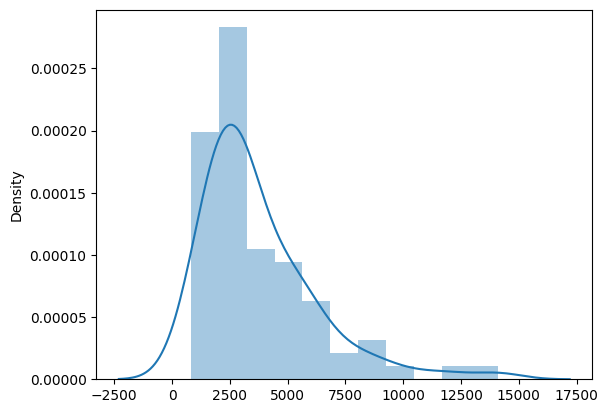

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x = characters)

#### Calculating each Word Characterstic in dataframe

In [33]:
words = Resume['CV'].apply(lambda x: len(str(x).split(' ')))
words

,CV
0,207
1,130
2,685
3,707
4,553
...,...
74,658
75,644
76,768
77,259


In [34]:
print('Total Number of Word in dataset:',words.sum())
print('Mean of each Word in datset:',words.mean())
print('Median of Word in dataset:',words.median())
print('Standard Deviation of Word in dataset:',words.std())
print('skew of Word dataset:',words.skew())

Total Number of Word in dataset: 36185
Mean of each Word in datset: 458.0379746835443
Median of Word in dataset: 380.0
Standard Deviation of Word in dataset: 295.5711308826187
skew of Word dataset: 1.6889132345848146


<Axes: ylabel='Density'>

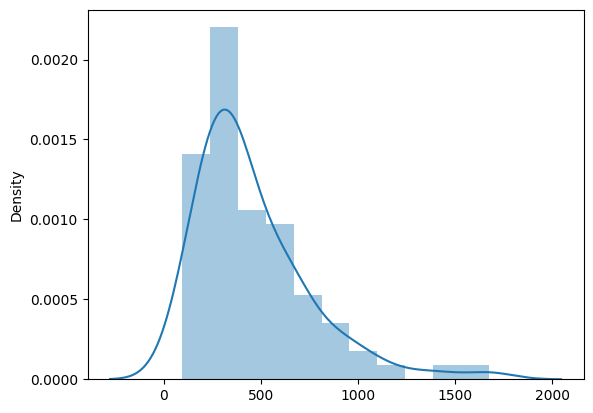

In [35]:
sns.distplot(x = words)

### VISUALIZATION OF DATASET

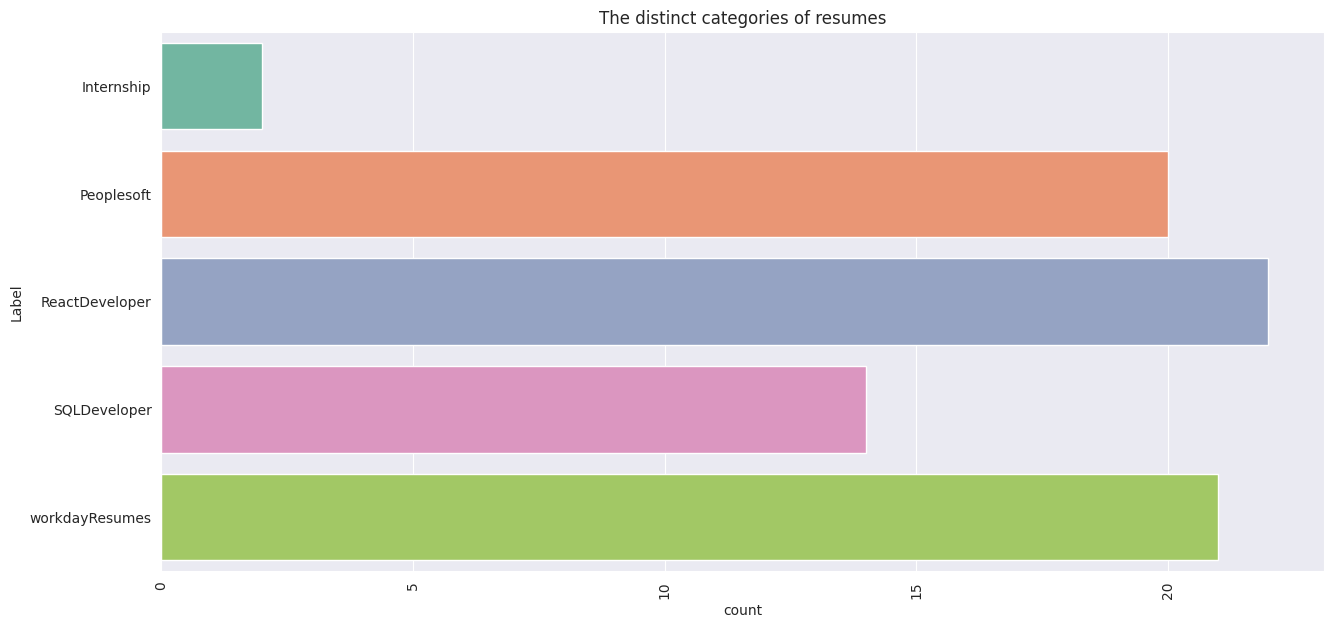

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Instead of:
# plt.style.use('seaborn-dark-palette')

# Use:
sns.set_style('darkgrid')  # Or 'dark', 'whitegrid', 'white', 'ticks'

# ... rest of your plotting code ...

plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Label", data=Resume,palette=("Set2"))
plt.show()

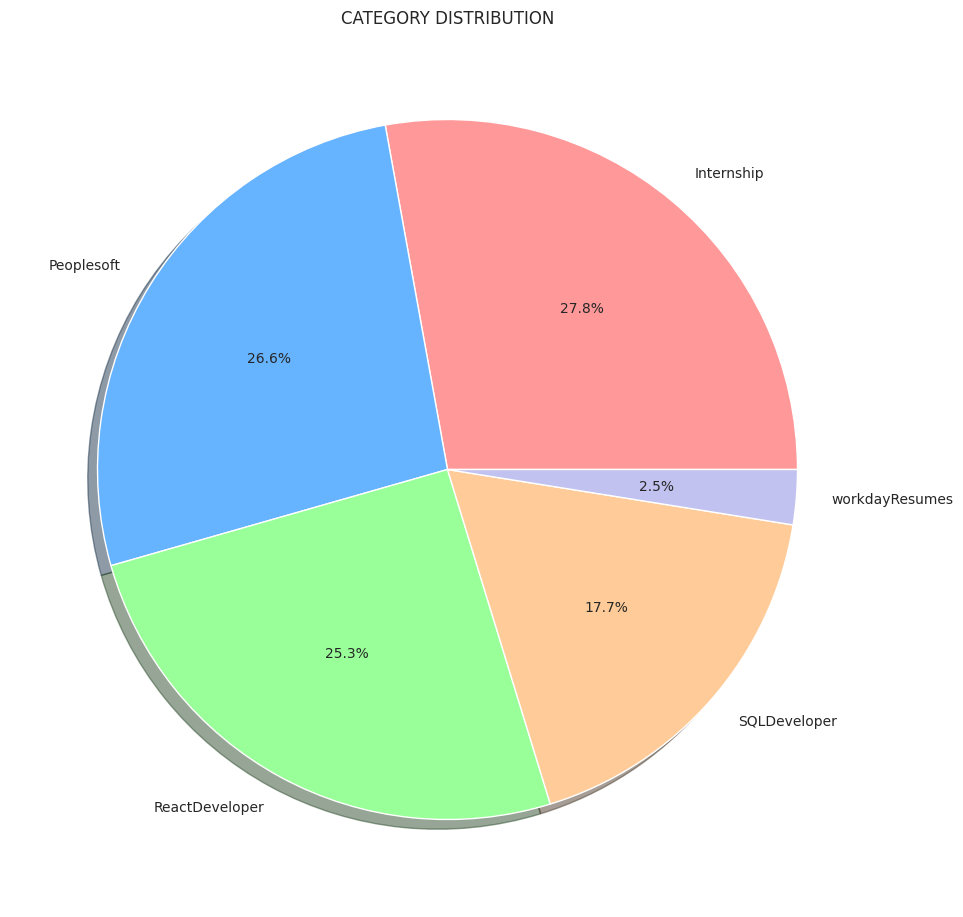

In [38]:
from matplotlib.gridspec import GridSpec
targetCounts = Resume.Label.value_counts()
targetLabels  = Resume.Label.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')


source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

#### Feature Extraction

In [39]:
from collections import Counter
import seaborn as sns

In [42]:
words =['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support',
 'application','new','People','I','team','working',
 'Database','database','Integration','Domains','client',
 'requirements','Core',  'Business',
'Oracle','Report', 'Developer', 'Data']
indices = np.random.zipf(1.6, size=500).astype(int) % len(words)  # Use int instead of np.int
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]


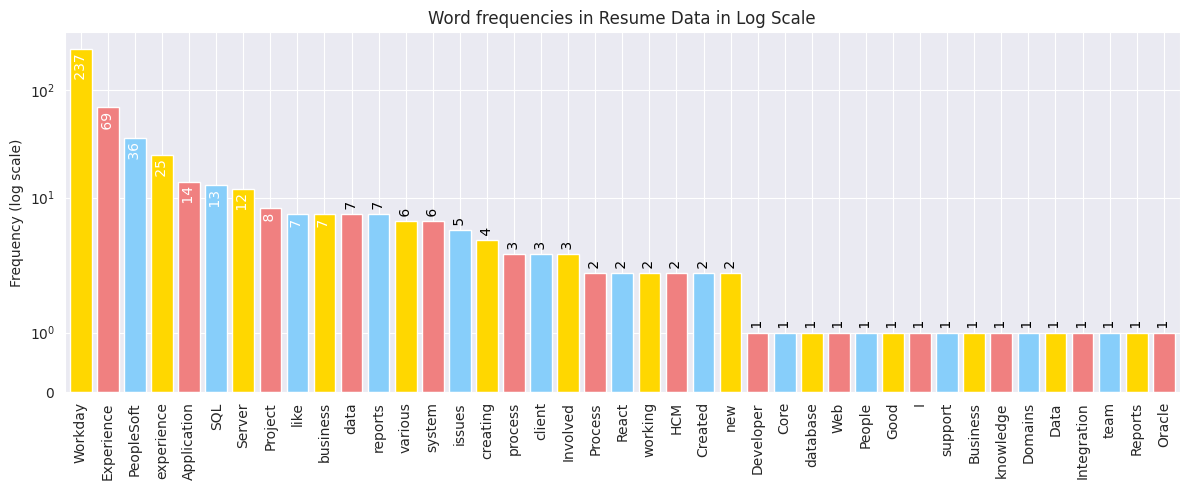

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.bar(x, y, color=['gold','lightcoral', 'lightskyblue'])
plt.title("Word frequencies in Resume Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog')
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(50)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4)
plt.tight_layout()
plt.show()

In [44]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

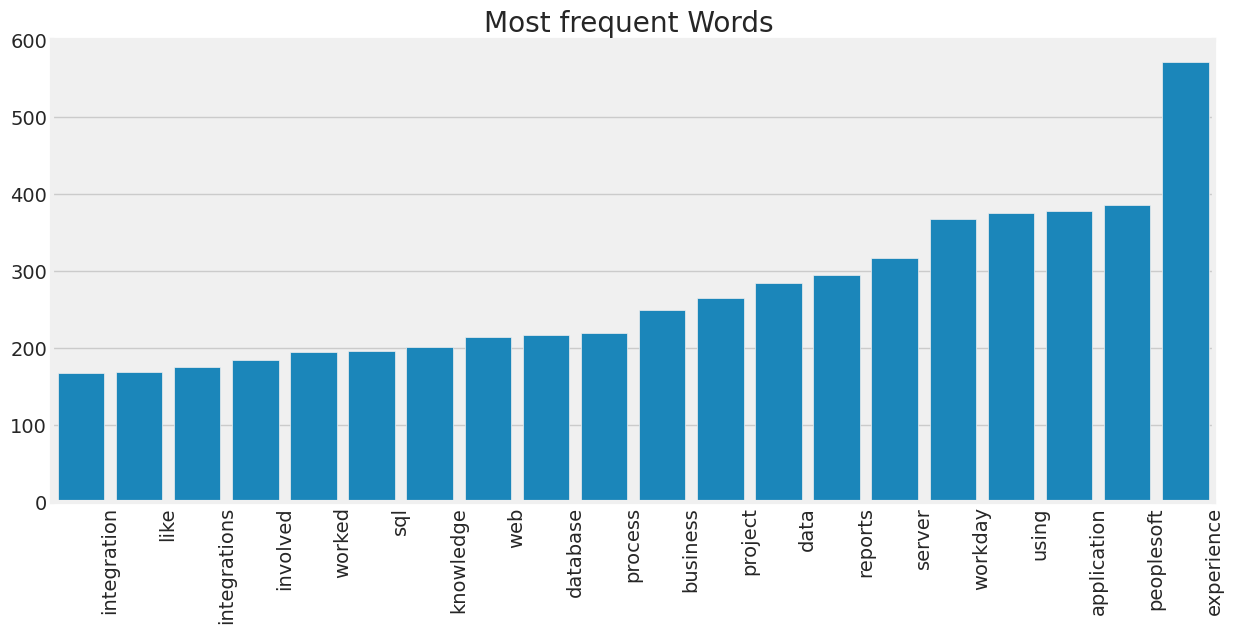

In [45]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(Resume,"CV","Most frequent Words ")

#### WORDCLOUD

In [46]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

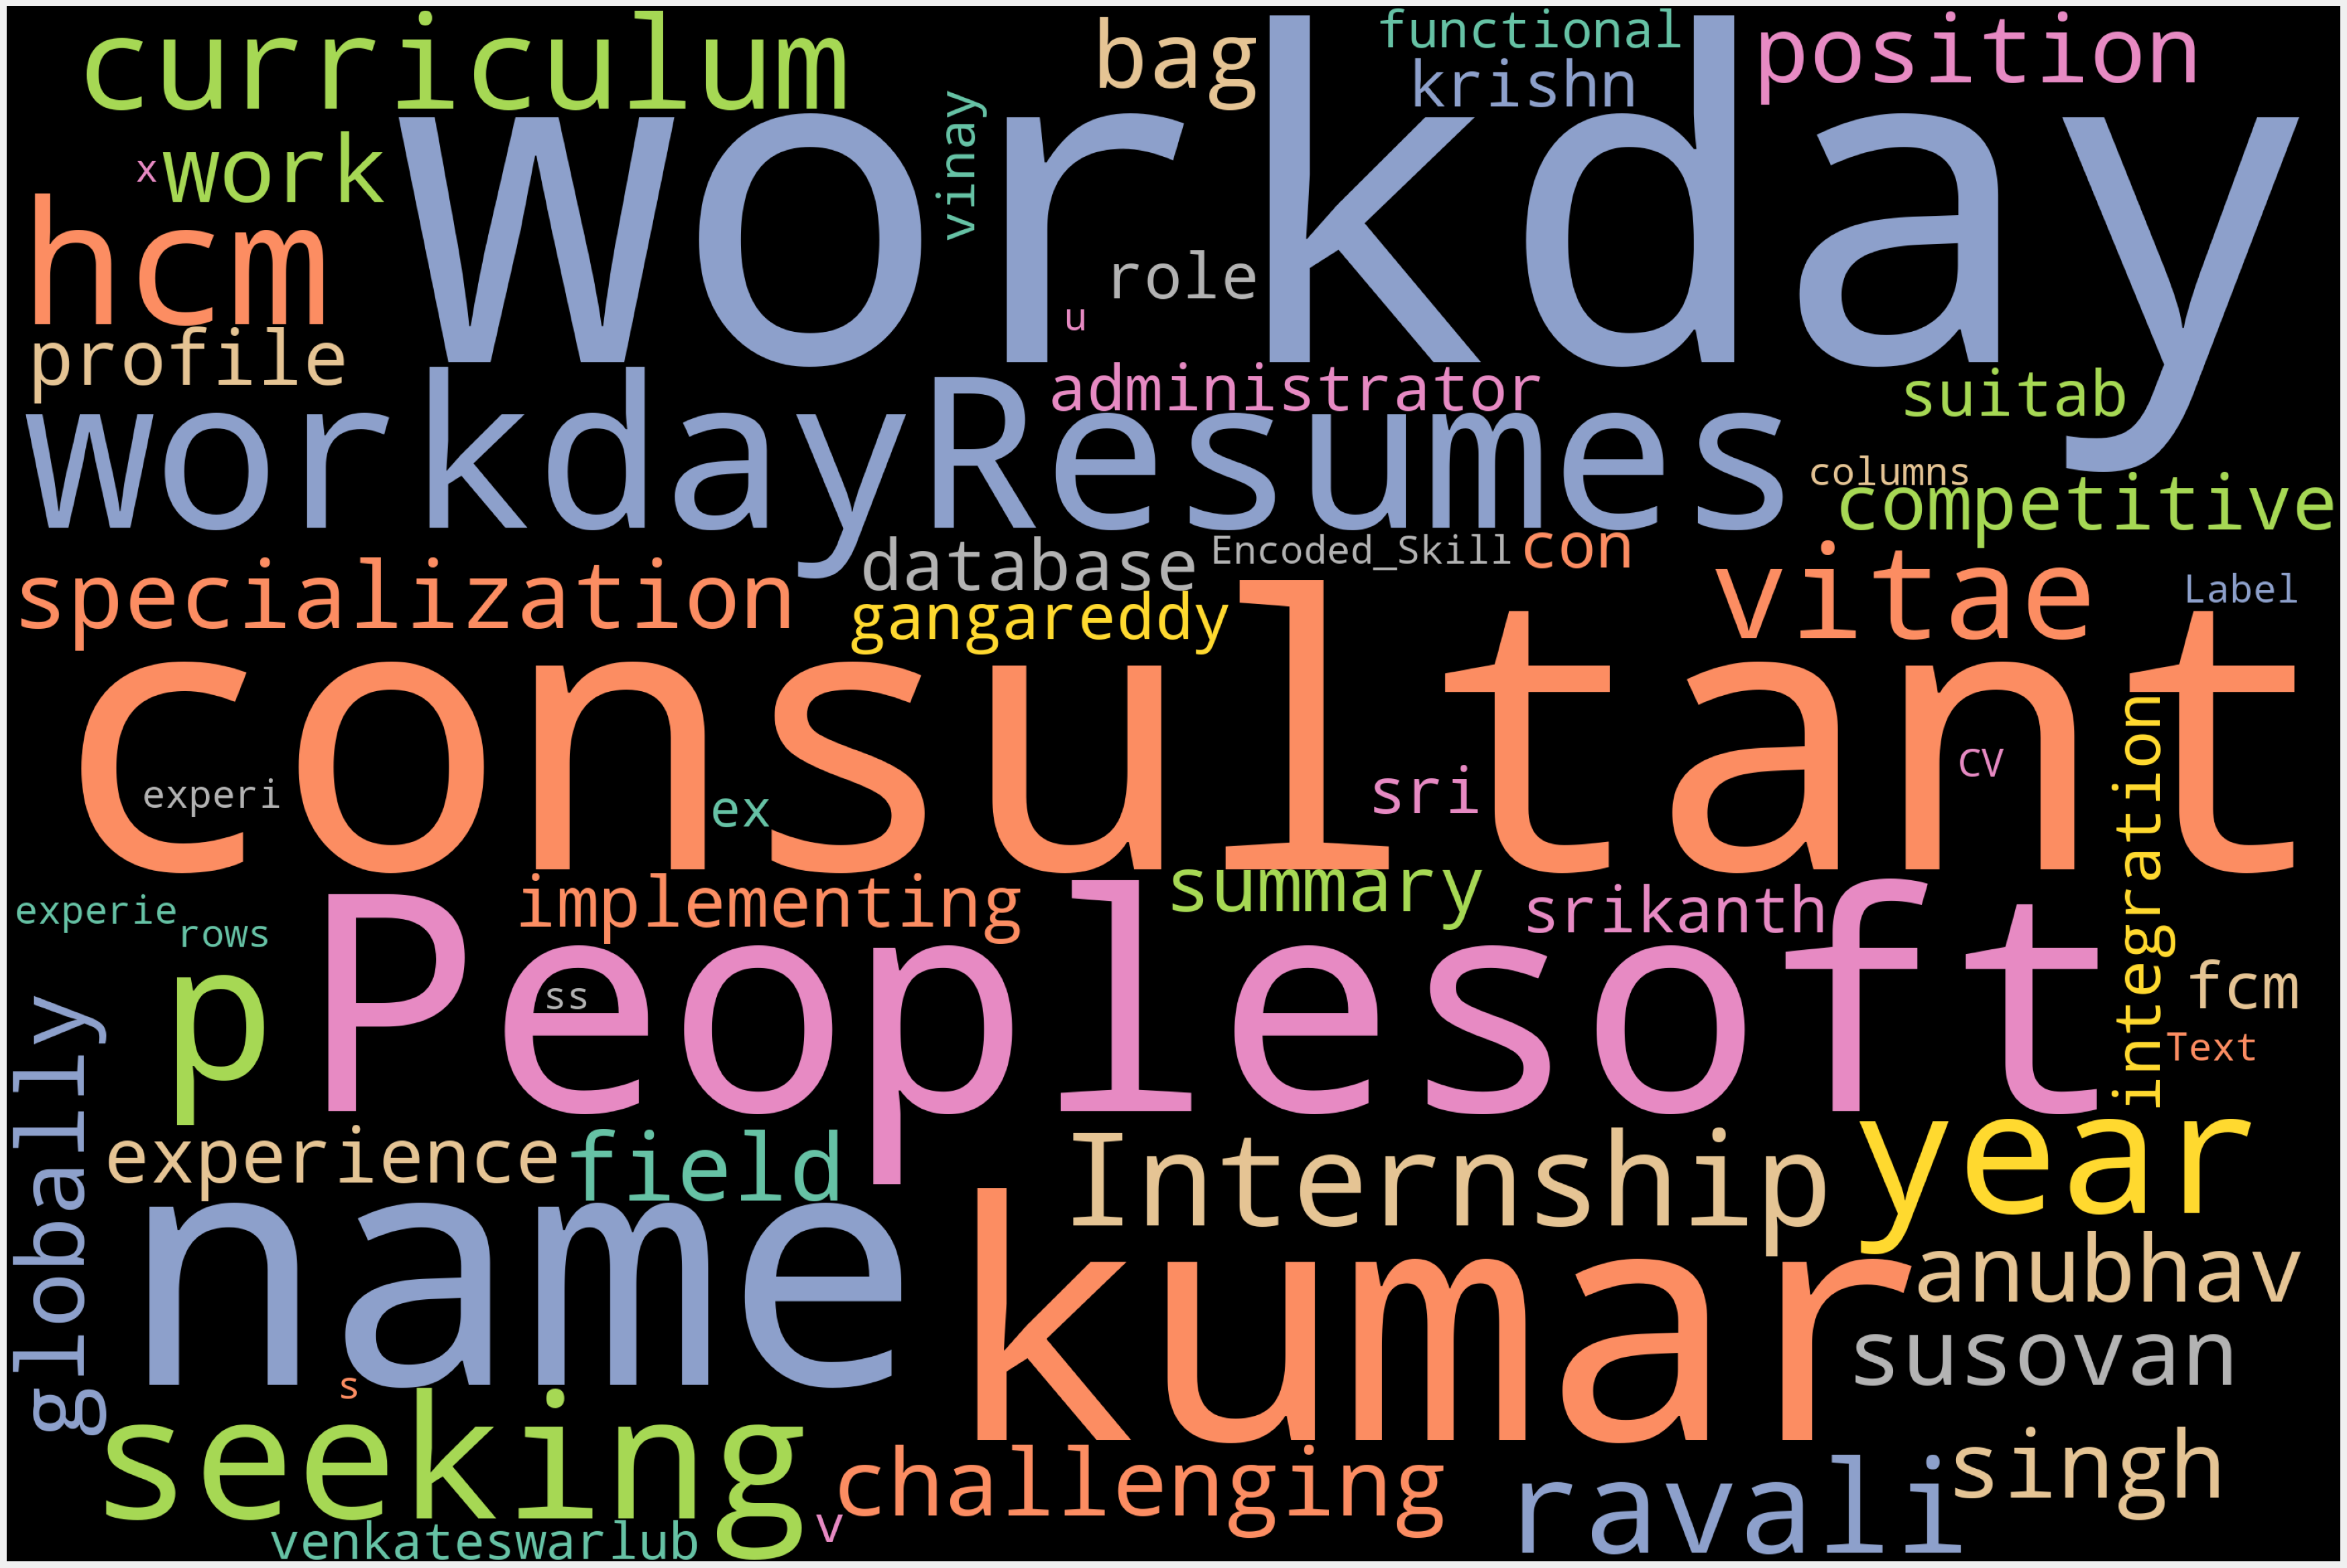

In [47]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(Resume))
# Plot
plot_cloud(wordcloud)

#### Bag Of Words

In [48]:
requiredText = Resume["CV"]
requiredTarget = Resume["Encoded_Skill"].values
Countvectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = Countvectorizer.fit_transform(requiredText)
Countvectorizer.vocabulary_

{'ravali': 3137,
 'p': 2706,
 'curriculum': 914,
 'vitae': 4200,
 'specialization': 3623,
 'computer': 722,
 'science': 3417,
 'engg': 1270,
 'utilize': 4118,
 'technical': 3870,
 'skills': 3570,
 'achieving': 39,
 'target': 3844,
 'developing': 1075,
 'best': 394,
 'performance': 2795,
 'organization': 2667,
 'manual': 2292,
 'testing': 3909,
 'strong': 3738,
 'knowledge': 2107,
 'sdlc': 3435,
 'concepts': 727,
 'extensive': 1386,
 'white': 4262,
 'box': 448,
 'good': 1609,
 'functional': 1537,
 'integration': 1952,
 'extreme': 1393,
 'adhoc': 72,
 'reliability': 3225,
 'exploratory': 1375,
 'stlc': 3716,
 'test': 3905,
 'cases': 545,
 'scenarios': 3401,
 'globalization': 1595,
 'compatibility': 700,
 'regression': 3211,
 'plan': 2846,
 'agile': 108,
 'methdology': 2374,
 'scrum': 3434,
 'methodology': 2378,
 'expertise': 1371,
 'sprint': 3645,
 'planning': 2848,
 'meeting': 2356,
 'retrospective': 3312,
 'product': 2983,
 'backlog': 340,
 'bug': 479,
 'triage': 4018,
 'normalization'

#### VECTORIZATION

#### COUNT VECTORIZER tells the frequency of a word.

In [50]:

vectorizer1 = CountVectorizer(min_df=1, max_df=0.9)
count_vect = vectorizer1.fit_transform(Resume["CV"])

word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names_out(), 'occurrences': np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

word_freq_df

,term,occurrences,frequency
0,aa,1,0.000028
1,abdul,2,0.000057
2,abilities,4,0.000114
3,abilitiescommunication,1,0.000028
4,ability,37,0.001053
...,...,...,...
4428,òpaper,1,0.000028
4429,òposter,1,0.000028
4430,ôbroadband,1,0.000028
4431,þnding,1,0.000028


<Axes: ylabel='Density'>

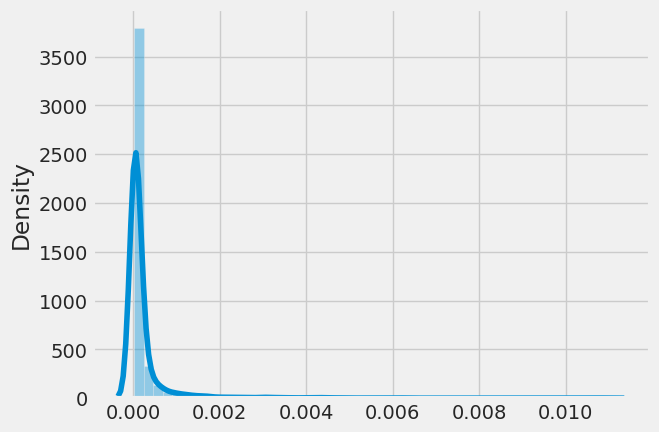

In [51]:
sns.distplot(x =[word_freq_df['frequency']])

#### TFIDF - Term frequency inverse Document Frequency

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english',max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

### Model Building || Model Training || Model Evaluation

#### DATA PREPARATION

In [54]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size=0.2)
print("X Train shape:",x_train.shape)
print("Y Train shape:",y_train.shape)
print("x Test shape:",x_test.shape)
print("y Test shape:",y_test.shape)


X Train shape: (63, 1500)
Y Train shape: (63,)
x Test shape: (16, 1500)
y Test shape: (16,)


### 1. LOGISTIC REGRESSION

In [55]:
#IMPORTING NECESSARY LIBRARIES FOR LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [56]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train,y_train)

#Predicting on Training Data
pred_train_log = logistic_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_log = np.mean(pred_train_log==y_train)
print("ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION:", train_acc_log)

#Predicting on Test Data
pred_test_log = logistic_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_log = np.mean(pred_test_log==y_test)
print("ACCURACY OF TEST DATA IN LOGISTIC REGRESSION:",test_acc_log )

#Confusion Matrix
logistic_cm = confusion_matrix(y_test,pred_test_log)

#Classification Report
print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION:\n", classification_report(y_test,pred_test_log))

ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION: 0.9682539682539683
ACCURACY OF TEST DATA IN LOGISTIC REGRESSION: 0.9375
CLASSIFICATION REPORT OF LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         4
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         6

    accuracy                           0.94        16
   macro avg       0.88      0.95      0.89        16
weighted avg       0.97      0.94      0.94        16



In [57]:
accuracy_log = round(accuracy_score(y_test,pred_test_log),4)
precision_log = round(precision_score(y_test,pred_test_log,average = 'macro'),4)
recall_log = round(recall_score(y_test,pred_test_log,average = 'macro'),4)
f1_log = round(f1_score(y_test,pred_test_log,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_log )
print('Precision Score  : ',precision_log )
print('Recall Score     : ', recall_log)
print('f1-Score         : ',f1_log )

Accuracy Score   :  0.9375
Precision Score  :  0.875
Recall Score     :  0.95
f1-Score         :  0.8889


### 2. DECISION TREE

In [58]:
#IMPORTING NECESSARY LIBRARIES FOR DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [59]:
DT = DecisionTreeClassifier()
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
DT_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_dt = DT_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_dt = np.mean(pred_train_dt==y_train)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:",train_acc_dt )

#Predicting on Test Data
pred_test_dt = DT_classifier.predict(x_test)
#Accuracy on Test Data
test_acc_dt = np.mean(pred_test_dt==y_test)
print("ACCURACY OF TEST DATA IN DECISION TREE:",test_acc_dt )

#Confusion Matrix
dt_cm = confusion_matrix(y_test,pred_test_dt)

#Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(y_test,pred_test_dt))

ACCURACY OF TRAIN DATA IN DECISION TREE: 0.8253968253968254
ACCURACY OF TEST DATA IN DECISION TREE: 0.6875
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.44      1.00      0.62         4
           3       0.00      0.00      0.00         5
           4       1.00      1.00      1.00         6

    accuracy                           0.69        16
   macro avg       0.61      0.75      0.65        16
weighted avg       0.55      0.69      0.59        16



In [60]:
accuracy_dt = round(accuracy_score(y_test,pred_test_dt),4)
precision_dt = round(precision_score(y_test,pred_test_dt,average = 'macro'),4)
recall_dt = round(recall_score(y_test,pred_test_dt,average = 'macro'),4)
f1_dt = round(f1_score(y_test,pred_test_dt,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_dt )
print('Precision Score  : ',precision_dt )
print('Recall Score     : ', recall_dt)
print('f1-Score         : ',f1_dt )

Accuracy Score   :  0.6875
Precision Score  :  0.6111
Recall Score     :  0.75
f1-Score         :  0.6538


### 3. RANDOM FOREST

In [61]:
#IMPORTING NECESSARY LIBRARIES FOR RANDOM FOREST
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [62]:
RF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF_classifier = RandomForestClassifier(**RF)
RF_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_rf = RF_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf==y_train)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:",train_acc_rf)

#Predicting on Test Data
pred_test_rf = RF_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_rf = np.mean(pred_test_rf==y_test)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:",test_acc_rf )

#Confusion Matrix
rf_cm = confusion_matrix(y_test,pred_test_rf)

#Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(y_test,pred_test_rf))

ACCURACY OF TRAIN DATA IN RANDOM FOREST: 1.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 1.0
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [63]:
accuracy_rf = round(accuracy_score(y_test,pred_test_rf),4)
precision_rf = round(precision_score(y_test,pred_test_rf,average = 'macro'),4)
recall_rf = round(recall_score(y_test,pred_test_rf,average = 'macro'),4)
f1_rf = round(f1_score(y_test,pred_test_rf,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_rf )
print('Precision Score  : ',precision_rf )
print('Recall Score     : ', recall_rf)
print('f1-Score         : ',f1_rf )

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


### 4. MULTINOMIAL NAVIE BAYES

In [64]:
#IMPORTING NECESSARY LIBRARIES FOR MULTINOMIAL NAVIE BAYES
from sklearn.naive_bayes import MultinomialNB as MB

In [65]:
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

#Predicting On Train Data
pred_train_mb = classifier_mb.predict(x_train)
#Accuracy On Train Data
train_acc_mb = np.mean(pred_train_mb==y_train)
print("ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES:", train_acc_mb)

#Predicting On Test Data
pred_test_mb = classifier_mb.predict(x_test)
#Accuracy On Test Data
test_acc_mb = np.mean(pred_test_mb==y_test)
print("ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES:", test_acc_mb)

#Confusion Matrix
mb_cm = confusion_matrix(y_test,pred_test_mb)

#Classification Report
print("CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:\n", classification_report(y_test,pred_test_mb))

ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES: 0.9682539682539683
ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES: 0.875
CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.80      1.00      0.89         4
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         6

    accuracy                           0.88        16
   macro avg       0.82      0.90      0.83        16
weighted avg       0.92      0.88      0.87        16



In [66]:
accuracy_mb = round(accuracy_score(y_test,pred_test_mb),4)
precision_mb = round(precision_score(y_test,pred_test_mb,average = 'macro'),4)
recall_mb = round(recall_score(y_test,pred_test_mb,average = 'macro'),4)
f1_mb = round(f1_score(y_test,pred_test_mb,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_mb )
print('Precision Score  : ',precision_mb )
print('Recall Score     : ', recall_mb)
print('f1-Score         : ',f1_mb )

Accuracy Score   :  0.875
Precision Score  :  0.825
Recall Score     :  0.9
f1-Score         :  0.8264


### 5. SUPPORT VECTOR MACHINE

In [67]:
##IMPORTING NECESSARY LIBRARIES FOR SUPPORT VECTOR MACHINE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [68]:
svm_classifier = (SVC(kernel='linear'))
svm_classifier.fit(x_train,y_train)

#Predicting On Train Data
pred_train_svm = svm_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_svm = np.mean(pred_train_svm==y_train)
print("ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE:",train_acc_svm )

#Prediciting On Test Data
pred_test_svm = svm_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_svm = np.mean(pred_test_svm==y_test)
print("ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE:",test_acc_svm)

#Confusion Matrix
svm_cm = confusion_matrix(y_test,pred_test_svm)

#Classification Report
print("CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:\n", classification_report(y_test,pred_test_svm))

ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE: 1.0
ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE: 1.0
CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [69]:
accuracy_svm = round(accuracy_score(y_test,pred_test_svm),4)
precision_svm = round(precision_score(y_test,pred_test_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test,pred_test_svm,average = 'macro'),4)
f1_svm = round(f1_score(y_test,pred_test_svm,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_svm )
print('Precision Score  : ',precision_svm )
print('Recall Score     : ', recall_svm)
print('f1-Score         : ',f1_svm )

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


### CONFUSION MATRIX

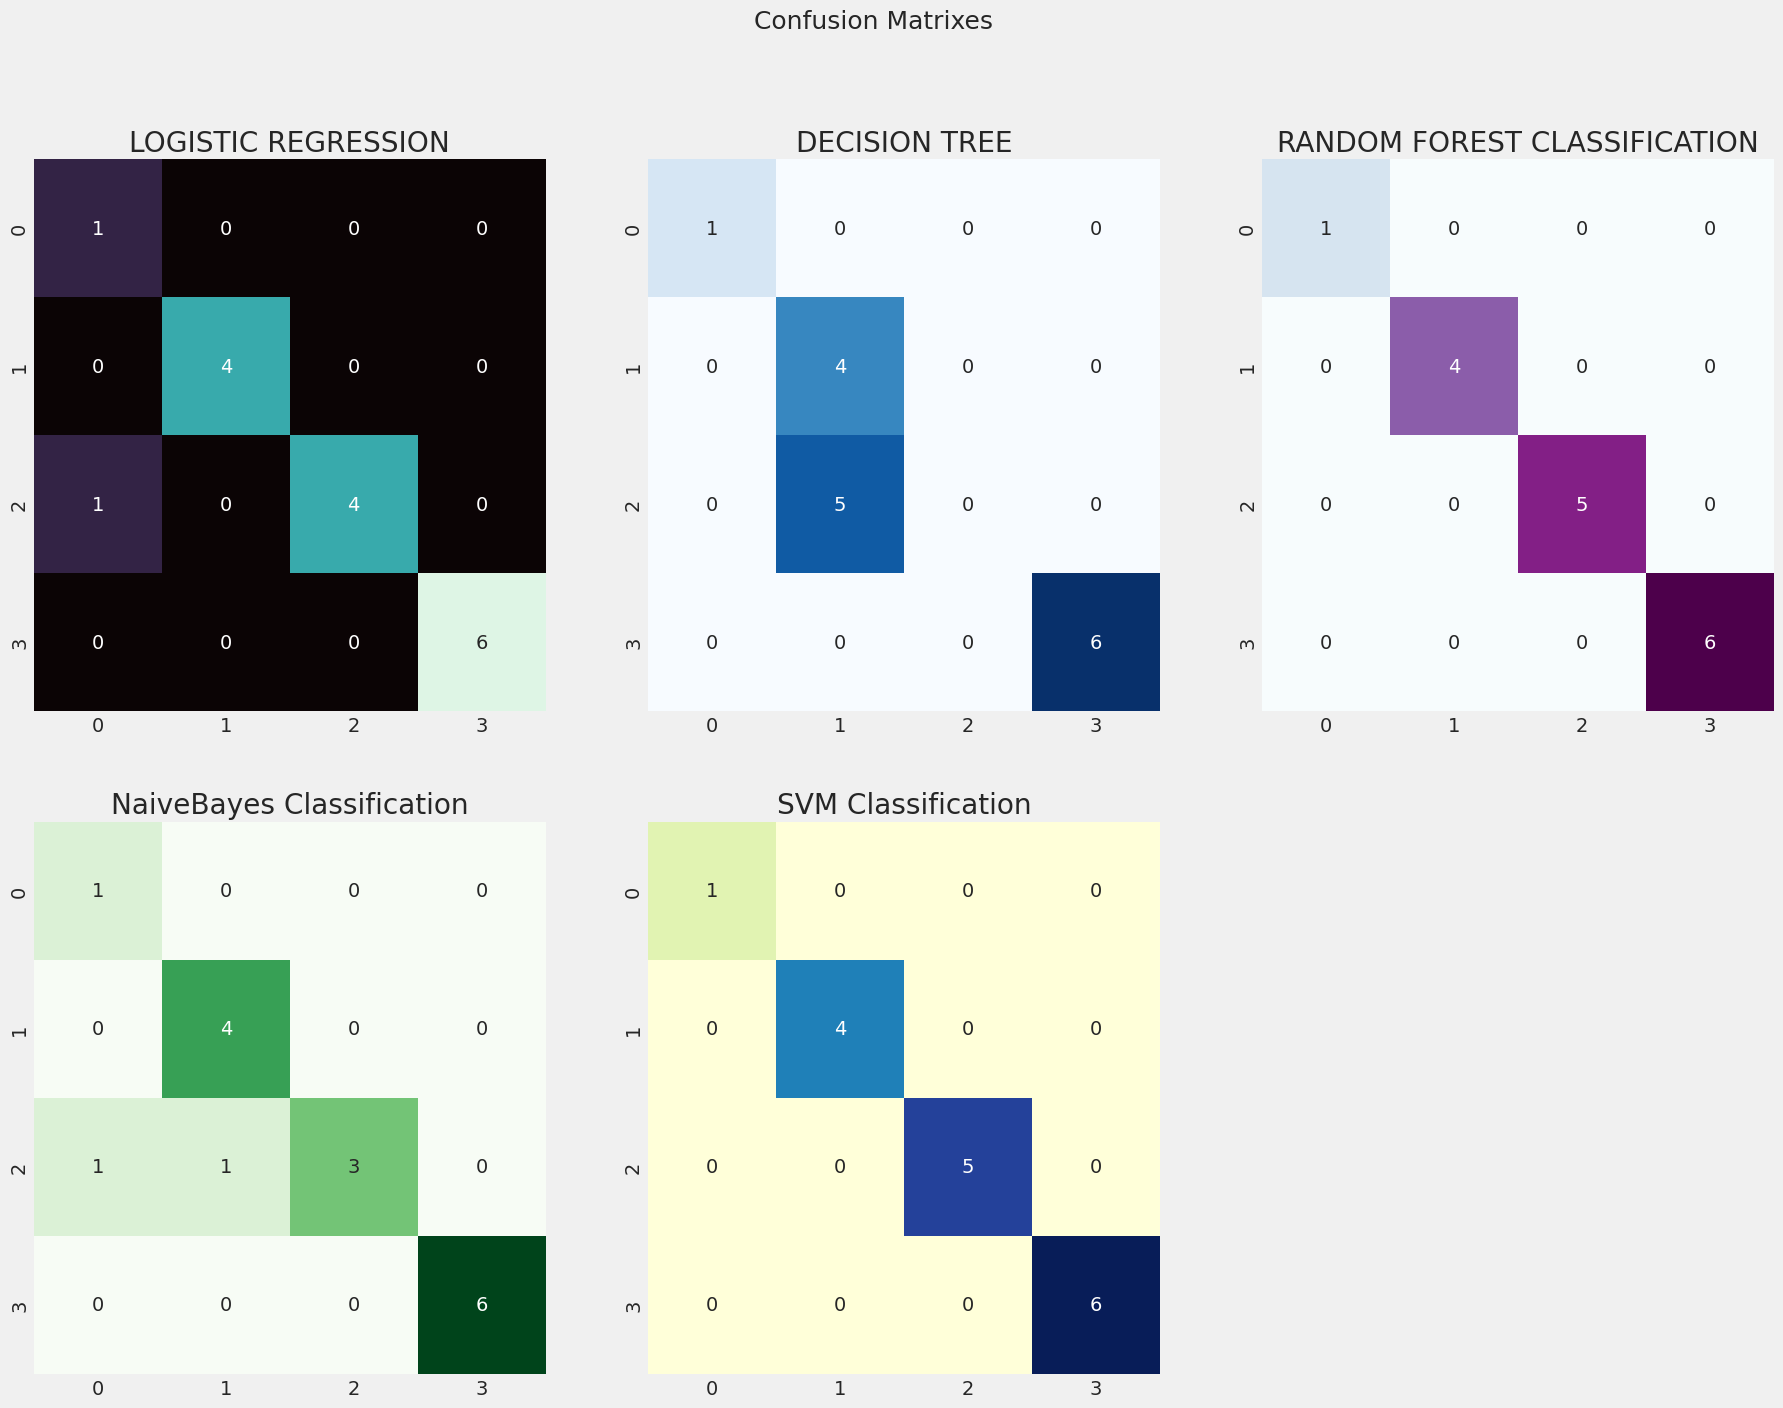

In [70]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("LOGISTIC REGRESSION")
sns.heatmap(logistic_cm, cbar=False, annot=True, cmap="mako",  fmt="d")

plt.subplot(2,3,2)
plt.title("DECISION TREE")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="Blues", fmt="d")

plt.subplot(2,3,3)
plt.title("RANDOM FOREST CLASSIFICATION")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(mb_cm, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(2,3,5)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

plt.show()

In [71]:
table = {'Classifier' : ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'MULTINOMIAL NAIVE BAYES', 'SUPPORT VECTOR MACHINE'], 'Accuracy_Score' : [accuracy_log, accuracy_dt, accuracy_rf, accuracy_mb, accuracy_svm], 'Precision_Score' : [precision_log, precision_dt, precision_rf, precision_mb, precision_svm], 'Recall_Score' : [recall_log, recall_dt, recall_rf, recall_mb, recall_svm], 'F1-Score' : [f1_log, f1_dt, f1_rf, f1_mb, f1_svm]}
table = pd.DataFrame(table)
table


,Classifier,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,LOGISTIC REGRESSION,0.9375,0.8750,0.95,0.8889
1,DECISION TREE,0.6875,0.6111,0.75,0.6538
2,RANDOM FOREST,1.0000,1.0000,1.00,1.0000
3,MULTINOMIAL NAIVE BAYES,0.8750,0.8250,0.90,0.8264
4,SUPPORT VECTOR MACHINE,1.0000,1.0000,1.00,1.0000


### ACCURACY COMPARISON PLOT

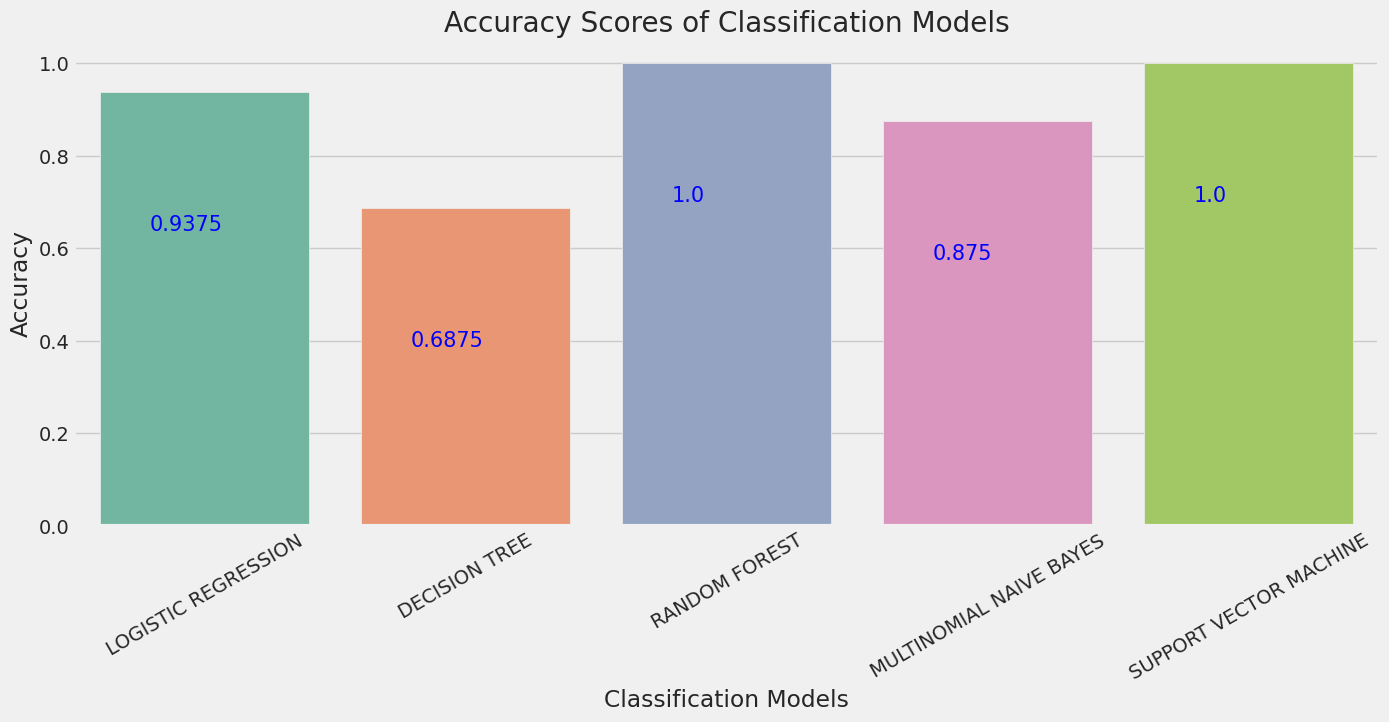

In [72]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

### FINALIZING MODEL

#### We finalize RANDOM FOREST as it gives 100% Accuracy. Random Forest fits the model in Resume Classification.

#### Deployment Process